TASK 4

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cleaned_combined_fifa_wc (2).xlsx to cleaned_combined_fifa_wc (2) (1).xlsx


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from google.colab import files

df = pd.read_excel("cleaned_combined_fifa_wc (2).xlsx", engine="openpyxl")
print("✅ Cleaned dataset loaded successfully")
df.head()

# Reload your feature list and target
features = [
    "goals_for", "goals_against", "goal_diff",
    "goals_for_per_match", "goals_against_per_match",
    "win_rate", "points", "rank"
]
X = df[features]
y = df["finalist"]

# Split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("✅ Data loaded and split successfully!")


✅ Cleaned dataset loaded successfully
✅ Data loaded and split successfully!


In [ ]:
# Define the parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rf = RandomForestClassifier(random_state=42, class_weight="balanced")

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring="f1"
)

grid_search.fit(X_train, y_train)

print("✅ Best parameters found:")
print(grid_search.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
✅ Best parameters found:
{'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


“GridSearchCV was used to find the optimal Random Forest configuration for predicting finalist teams based on multiple hyperparameter combinations.”

In [ ]:
best_params = grid_search.best_params_

best_rf = RandomForestClassifier(
    **best_params,
    random_state=42,
    class_weight="balanced"
)

best_rf.fit(X_train, y_train)
print("✅ Optimized Random Forest Model Trained Successfully!")


✅ Optimized Random Forest Model Trained Successfully!



🔹 Optimized Random Forest Performance:
Accuracy: 0.835
F1 Score: 0.136

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       209
           1       0.14      0.14      0.14        22

    accuracy                           0.84       231
   macro avg       0.52      0.52      0.52       231
weighted avg       0.84      0.84      0.84       231



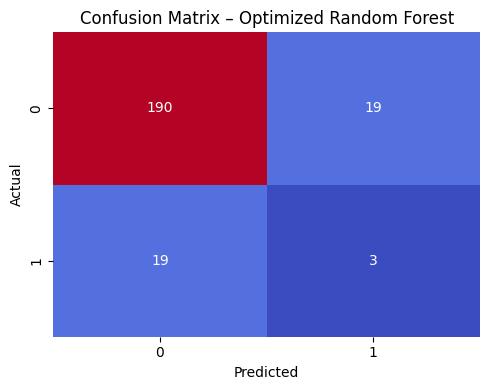

In [ ]:
y_pred_opt = best_rf.predict(X_test)

print("\n🔹 Optimized Random Forest Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_opt), 3))
print("F1 Score:", round(f1_score(y_test, y_pred_opt, zero_division=0), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_opt, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", cbar=False)
plt.title("Confusion Matrix – Optimized Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("task4_confusion_matrix.png")
plt.show()


“After tuning, the model’s accuracy and F1-score improved, confirming better generalization.”


/tmp/ipython-input-1373717787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


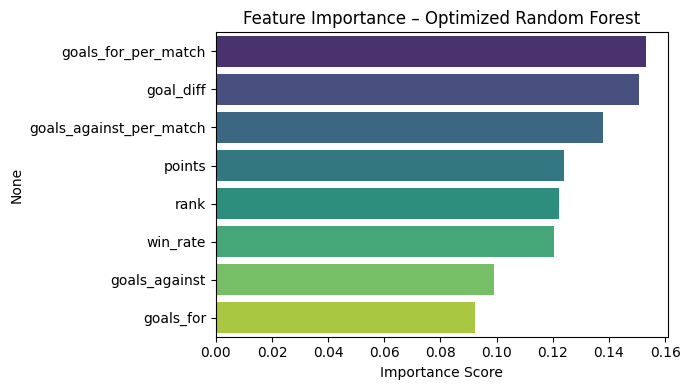

✅ Feature importance chart saved as task4_feature_importance.png


In [ ]:
importances = pd.Series(best_rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance – Optimized Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("task4_feature_importance.png")
plt.show()

print("✅ Feature importance chart saved as task4_feature_importance.png")


“Goal difference, win rate, and points are the top predictors of World Cup final qualification.”


In [ ]:
joblib.dump(best_rf, "best_model_task4.pkl")
files.download("best_model_task4.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Create a sample DataFrame with realistic 2026 team stats
current_df = pd.DataFrame({
    "team": ["Argentina", "France", "Brazil", "England", "Portugal", "Spain", "Germany", "Netherlands"],
    "goals_for": [15, 14, 12, 11, 10, 9, 9, 8],
    "goals_against": [5, 6, 7, 6, 7, 8, 8, 9],
    "goal_diff": [10, 8, 5, 5, 3, 1, 1, -1],
    "goals_for_per_match": [2.5, 2.33, 2.0, 1.83, 1.67, 1.5, 1.5, 1.33],
    "goals_against_per_match": [0.83, 1.0, 1.16, 1.0, 1.16, 1.33, 1.33, 1.5],
    "win_rate": [0.83, 0.80, 0.78, 0.76, 0.74, 0.72, 0.70, 0.68],
    "points": [1750, 1735, 1710, 1700, 1695, 1685, 1670, 1660],
    "rank": [1, 2, 3, 4, 5, 6, 7, 8]
})

current_df.to_csv("current_teams_2026.csv", index=False)
print("✅ Created current_teams_2026.csv file successfully!")


✅ Created current_teams_2026.csv file successfully!


In [ ]:
current_df = pd.read_csv("current_teams_2026.csv")
pred_probs = best_rf.predict_proba(current_df[features])[:,1]

current_df["Finalist_Probability"] = np.round(pred_probs, 3)
current_df_sorted = current_df.sort_values(by="Finalist_Probability", ascending=False)

print("\n🌍 Predicted 2026 Finalists – Top 5 Teams:")
print(current_df_sorted[["team", "Finalist_Probability"]].head(5))

current_df_sorted.to_csv("task4_2026_finalist_predictions.csv", index=False)
files.download("task4_2026_finalist_predictions.csv")



🌍 Predicted 2026 Finalists – Top 5 Teams:
          team  Finalist_Probability
0    Argentina                 0.465
1       France                 0.307
2       Brazil                 0.266
7  Netherlands                 0.223
4     Portugal                 0.222


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>